In [1]:
import plotly.express as px  
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np

In [62]:
def process_csv(input_filename):
    # Read the CSV file
    df = pd.read_csv(input_filename)
    
    # Convert 'sentiment' from string to dictionary
    df['sentiment'] = df['sentiment'].apply(ast.literal_eval)

    # Extract 'label' and 'score' into separate columns
    df['sentiment_label'] = df['sentiment'].apply(lambda x: x['label'])
    df['sentiment_score'] = df['sentiment'].apply(lambda x: x['score'])
    df['date'] = pd.to_datetime(df['date'])
    # Drop the original 'sentiment' column
    df = df.drop(['sentiment', 'Word_Count'], axis=1)
    
    return df

csv_files = [
    'data/lse_sentiment_data_2.csv',
    'data/ucl_sentiment_data_2.csv',
    'data/imperial_sentiment_data_2.csv',
    'data/kings_sentiment_data_2.csv',
    'data/oxbridge_sentiment_data_2.csv'
]
lse_df, ucl_df, imperial_df, kings_df, oxbridge_df = [process_csv(file) for file in csv_files]

In [65]:
lse_df

,post_index,text,flair,post_type,date,vader_compound_score,sentiment_label,sentiment_score
0,0,Its coming up to deadline and has anyone else ...,UNI / UCAS,post_text,2024-04-12 11:31:40,-0.3326,NEU,0.755852
1,0,I'm wondering if I should send them an email a...,UNI / UCAS,post_text,2024-04-12 11:31:40,0.0000,NEU,0.949166
2,1,I’ve heard that many people are dying to get a...,UNI / UCAS,post_text,2022-12-14 07:39:30,-0.3400,NEG,0.793681
3,2,I know there isn't a conclusive answer anybody...,UNI / UCAS,post_text,2024-04-11 13:56:05,0.2960,NEU,0.922507
4,2,I applied in October for econ and have been ac...,UNI / UCAS,post_text,2024-04-11 13:56:05,-0.6486,NEU,0.798900
...,...,...,...,...,...,...,...,...
4364,248,As for KCL I got my offer a week ago but would...,UNI / UCAS,comment_text,2023-12-20 14:19:44,0.2960,NEG,0.959583
4365,248,I was given an offer for law at qmul a while b...,UNI / UCAS,comment_text,2023-12-21 02:59:18,0.0000,NEU,0.895201
4366,248,one of my friends got rejected from qmul like ...,UNI / UCAS,comment_text,2023-12-21 13:13:37,-0.0258,NEG,0.968059
4367,248,i mean apart from like 2 econ offers i’ve seen...,UNI / UCAS,comment_text,2023-12-20 10:55:21,0.3612,NEU,0.965124


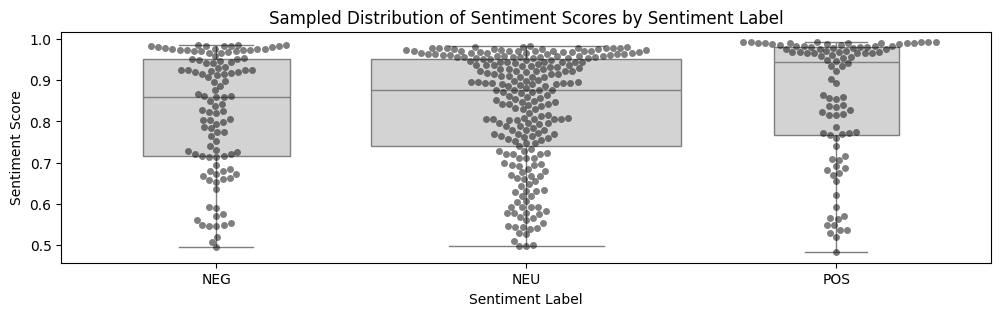

In [69]:
sample_fraction = 0.1  # Sample 10% of each category

# Sampling the data
sampled_df = df.groupby('sentiment_label').apply(lambda x: x.sample(frac=sample_fraction)).reset_index(drop=True)

frequencies = df['sentiment_label'].value_counts().sort_index()
# Normalize frequencies to scale box widths (between 0.5 and 1 for better visualization)
widths = (frequencies / frequencies.max())

# Create the plot
plt.figure(figsize=(12, 3))
sns.boxplot(x='sentiment_label', y='sentiment_score', data=sampled_df, color='lightgray', width=widths)
sns.swarmplot(x='sentiment_label', y='sentiment_score', data=sampled_df, color='black', alpha=0.5)

plt.title('Sampled Distribution of Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

In [34]:
# Group by year and label, then calculate the average sentiment score
lse_df['year'] = lse_df['date'].dt.year
average_scores = lse_df.groupby(['year', 'sentiment_label'])['sentiment_score'].count().reset_index()
average_scores

,year,sentiment_label,sentiment_score
0,2020,NEG,6
1,2020,NEU,12
2,2020,POS,33
3,2021,NEG,2
4,2021,NEU,2
5,2021,POS,13
6,2022,NEG,120
7,2022,NEU,264
8,2022,POS,108
9,2023,NEG,135


In [35]:
import plotly.express as px

# Use the previously grouped DataFrame directly
fig = px.bar(average_scores, x='year', y='sentiment_score', color='sentiment_label',
             barmode='group', 
             title='Average Sentiment Score by Year and Label',
             labels={'sentiment_score': 'Average Sentiment Score', 'year': 'Year'})

fig.show()

# average_scores.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
#          xlabel='Home Team', figsize=(6, 5))

In [ ]:
print(df.groupby(['year','sentiment_label']).mean())
print(df['year'].value_counts())

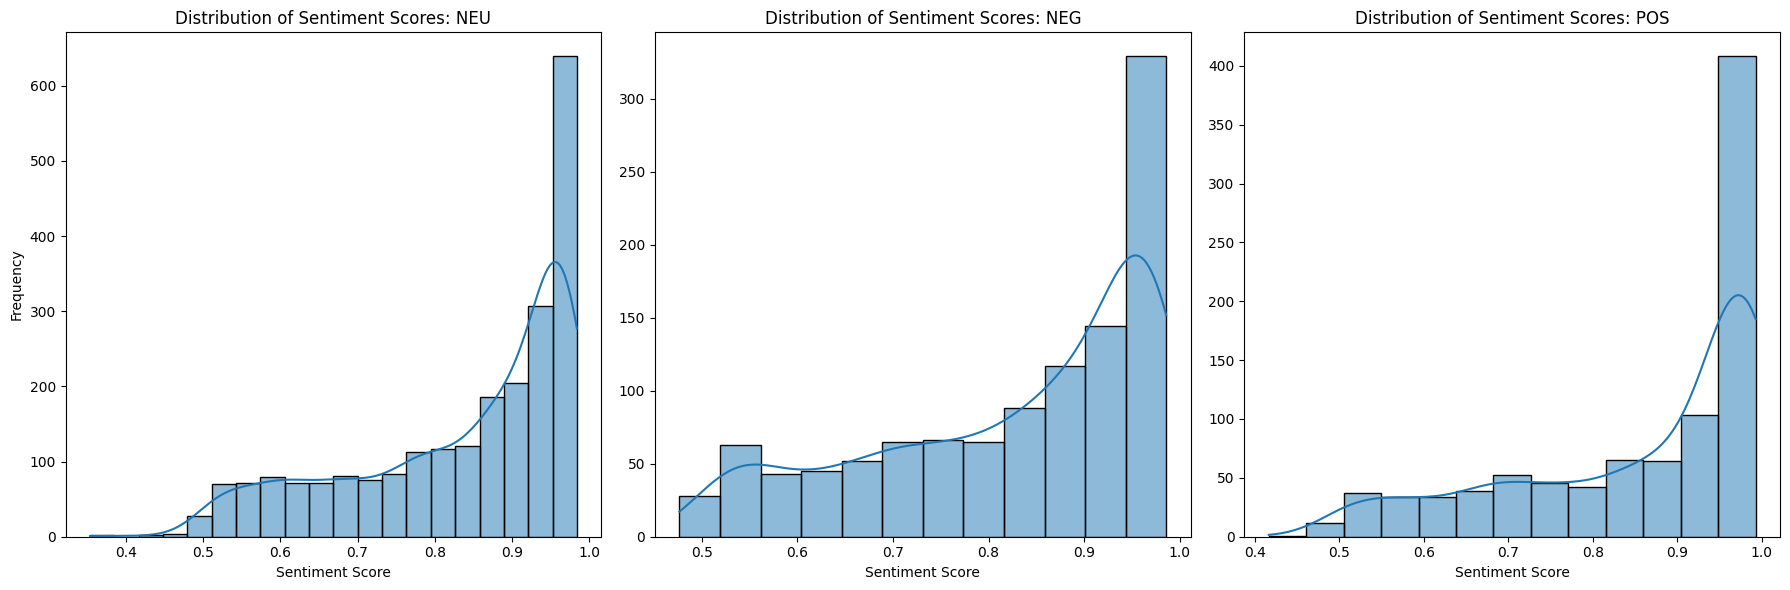

In [7]:
plt.figure(figsize=(18, 6))

# Sentiment labels to plot
labels = lse_df['sentiment_label'].unique()

# Create a subplot for each sentiment label
for index, label in enumerate(labels):
    plt.subplot(1, len(labels), index + 1)  # (1 row, n columns, nth plot)
    subset = lse_df[lse_df['sentiment_label'] == label]
    sns.histplot(subset['sentiment_score'], kde=True)
    plt.title(f'Distribution of Sentiment Scores: {label}')
    plt.xlabel('Sentiment Score')
    if index == 0:
        plt.ylabel('Frequency')
    else:
        plt.ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

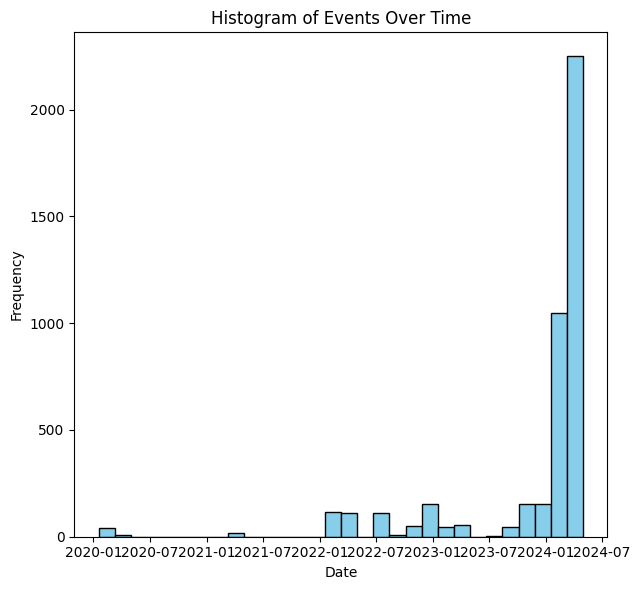

In [67]:
# Set the date column as the index
df.set_index('date', inplace=True)

# Resample and count events per day
daily_counts = df.resample('D').count()  # Change 'D' to 'M' for monthly, 'W' for weekly, etc.

# Plotting
plt.figure(figsize=(12, 6))

# Plotting histogram
plt.subplot(1, 2, 1)
plt.hist(df.index, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Plotting smooth line plot
plt.subplot(1, 2, 2)
sns.lineplot(data=daily_counts, marker='o', linestyle='-')
plt.title('Frequency of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Events')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22308\3863609179.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




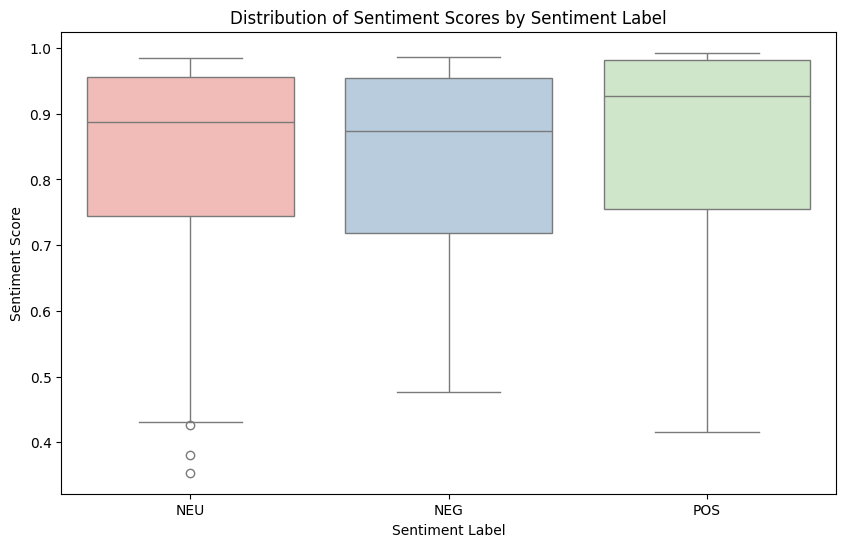

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_label', y='sentiment_score', data=lse_df, palette='Pastel1')
# sns.swarmplot(x='sentiment_label', y='sentiment_score', data=lse_df, color='black', alpha=0.5)

plt.title('Distribution of Sentiment Scores by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.show()

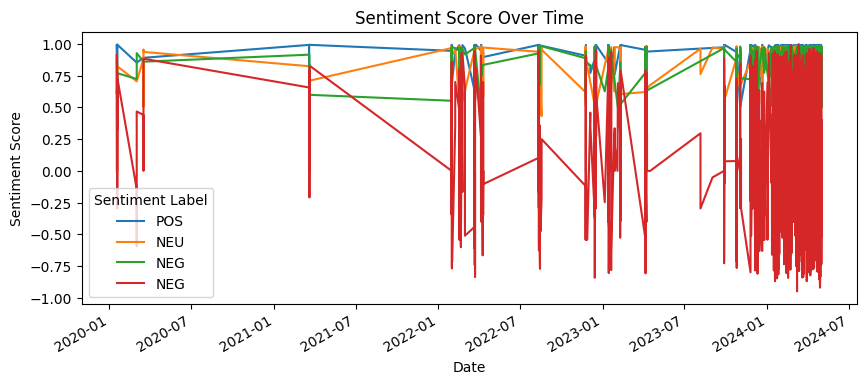

In [12]:
# Ensure the data is sorted by date if it's not
lse_df = lse_df.sort_values('date')
fig, ax = plt.subplots(figsize=(10, 4))  # Create a figure and an axes.

# Plot each sentiment category
# for label in lse_df['sentiment_label'].unique():
#     subset = lse_df[lse_df['sentiment_label'] == label]
#     subset.plot(x='date', y='sentiment_score', ax=ax, label=label)
lse_df.plot(x='date', y='vader_compound_score', ax=ax, label=label)
# Set plot title and labels
ax.set_title('Sentiment Score Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')

# Show legend
ax.legend(title='Sentiment Label')

# Show plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22308\464915353.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




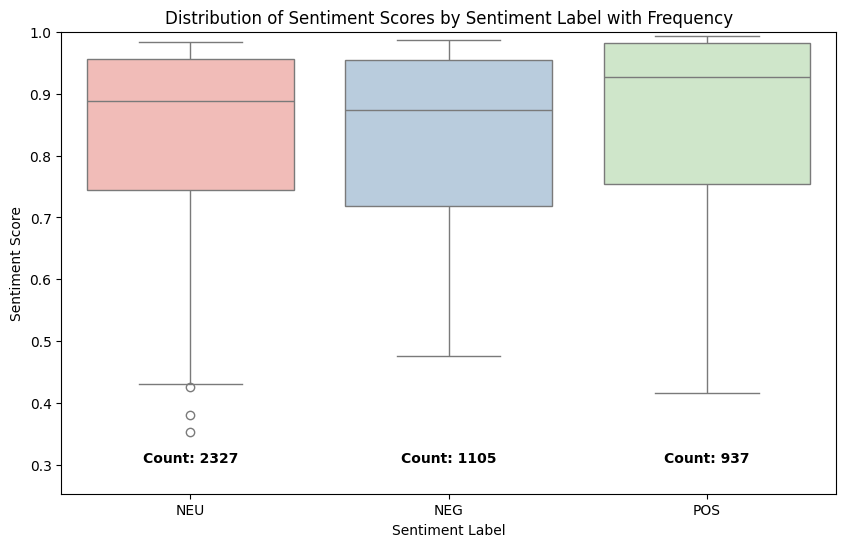

In [40]:
df = lse_df
label_counts = df['sentiment_label'].value_counts()

# Creating the box plot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='sentiment_label', y='sentiment_score', data=df, palette='Pastel1')

# Adding annotations with the frequency counts
for i, label in enumerate(label_counts.index):
    plt.text(i, df['sentiment_score'].min() - 0.05, f'Count: {label_counts[label]}', 
             horizontalalignment='center', color='black', weight='semibold')

plt.title('Distribution of Sentiment Scores by Sentiment Label with Frequency')
plt.xlabel('Sentiment Label')
plt.ylabel('Sentiment Score')
plt.ylim(df['sentiment_score'].min() - 0.1, 1)  # Adjust the y-limit to make space for text
plt.show()